In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
data=pd.read_excel("DA -Task 2..xlsx")

In [3]:
data.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [4]:
summary = pd.DataFrame({
    'Data Type': data.dtypes,
    'Unique Values': data.nunique(),
    'Missing %': data.isnull().mean().round(4) * 100
}).sort_values('Missing %', ascending=False)
summary.head(15)

,Data Type,Unique Values,Missing %
CAMPAIGN_NBR,float64,0,100.0
ENGINE_TRACE_NBR,object,88,12.0
TRANSMISSION_TRACE_NBR,object,88,12.0
ENGINE_SOURCE_PLANT,object,9,12.0
TRANSMISSION_SOURCE_PLANT,float64,6,12.0
OPTN_FAMLY_CERTIFICATION,object,3,10.0
TOTALCOST,float64,94,6.0
OPTF_FAMLY_EMISSIOF_SYSTEM,object,8,5.0
CAUSAL_PART_NM,object,18,5.0
LAST_KNOWN_DELVRY_TYPE_CD,float64,11,2.0


In [5]:
data['REPAIR_DATE'] = pd.to_datetime(data['REPAIR_DATE'], errors='coerce')
data['CUSTOMER_VERBATIM'] = data['CUSTOMER_VERBATIM'].fillna("Not provided")
data['CORRECTION_VERBATIM'] = data['CORRECTION_VERBATIM'].fillna("Not provided")
data['STATE'] = data['STATE'].str.upper().str.strip()
data['PLANT'] = data['PLANT'].str.upper().str.strip()
data['TOTALCOST'] = pd.to_numeric(data['TOTALCOST'], errors='coerce')
data['KM'] = pd.to_numeric(data['KM'], errors='coerce')
data['REPAIR_AGE'] = pd.to_numeric(data['REPAIR_AGE'], errors='coerce')

In [6]:
data = data[data['TOTALCOST'] < data['TOTALCOST'].quantile(0.99)]
data = data[data['KM'] < data['KM'].quantile(0.99)]
data.reset_index(drop=True, inplace=True)

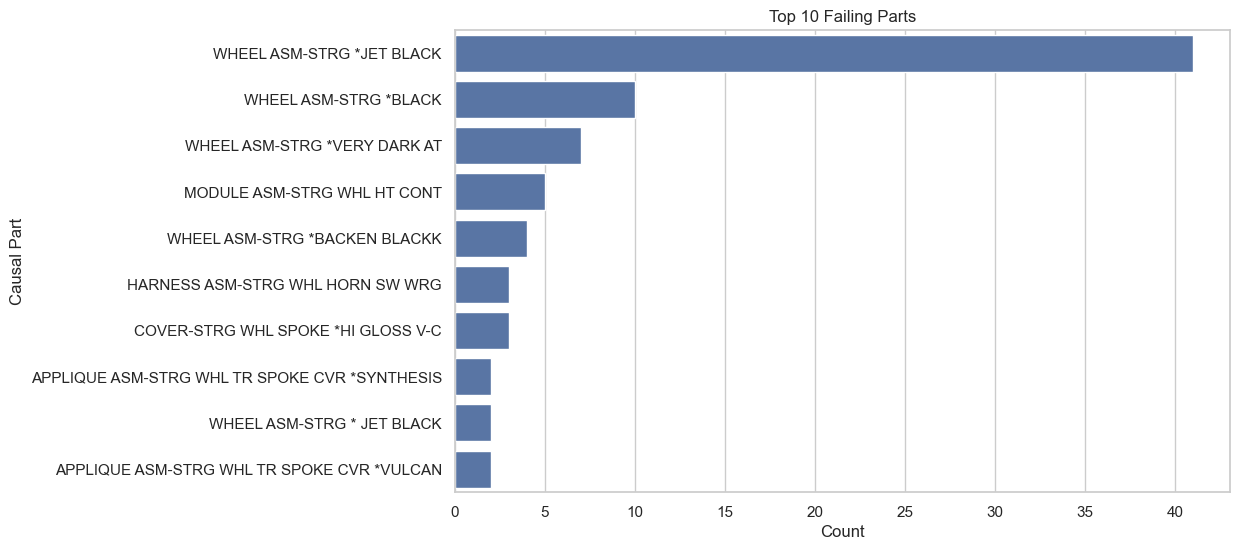

In [7]:
top_parts = data['CAUSAL_PART_NM'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_parts.values, y=top_parts.index)
plt.title("Top 10 Failing Parts")
plt.xlabel("Count")
plt.ylabel("Causal Part")
plt.show()

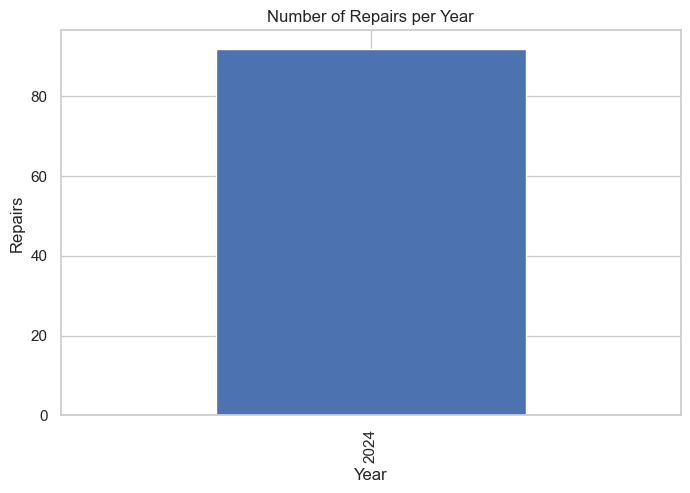

In [8]:
data['Year'] = data['REPAIR_DATE'].dt.year
plt.figure(figsize=(8, 5))
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Repairs per Year")
plt.xlabel("Year")
plt.ylabel("Repairs")
plt.show()

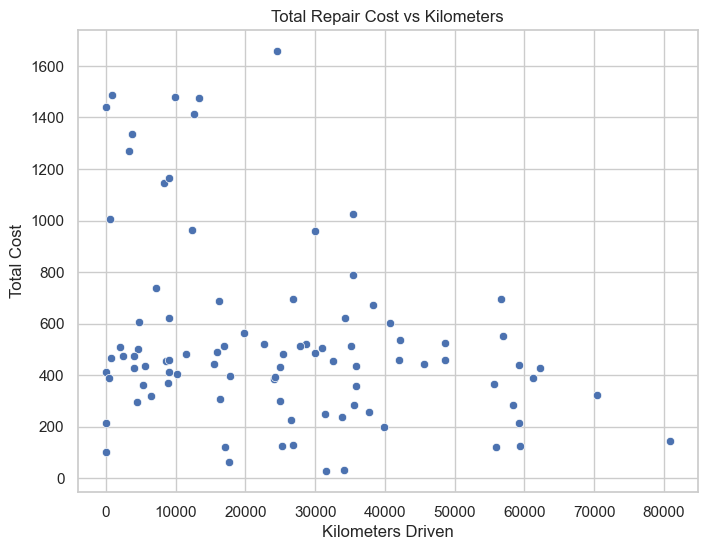

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='KM', y='TOTALCOST')
plt.title("Total Repair Cost vs Kilometers")
plt.xlabel("Kilometers Driven")
plt.ylabel("Total Cost")
plt.show()

In [10]:
def generate_tags(text):
    text = str(text).lower()
    tags = []
    if 'steering' in text:
        tags.append('Steering Issue')
    if 'heated' in text:
        tags.append('Heated Steering')
    if 'horn' in text:
        tags.append('Horn Problem')
    if 'assist' in text or 'driver assist' in text:
        tags.append('Driver Assist')
    return ', '.join(tags)

data['TAGS'] = data['CUSTOMER_VERBATIM'].apply(generate_tags)
data[['CUSTOMER_VERBATIM', 'TAGS']].head()

,CUSTOMER_VERBATIM,TAGS
0,STEERING WHEEL COMING APART,Steering Issue
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"Steering Issue, Heated Steering"
2,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,Steering Issue
3,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,Driver Assist
4,Horn and steering wheel switches are inoperable,"Steering Issue, Horn Problem"


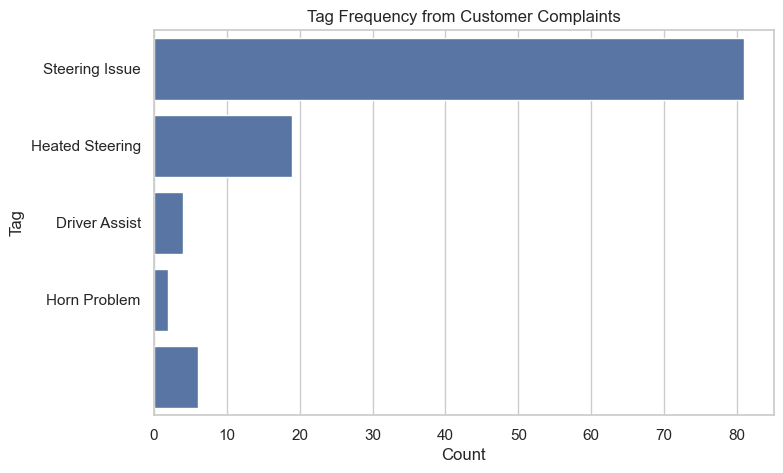

In [11]:
from collections import Counter
all_tags = data['TAGS'].dropna().str.split(', ').sum()
tag_counts = Counter(all_tags)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(tag_counts.values()), y=list(tag_counts.keys()))
plt.title("Tag Frequency from Customer Complaints")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

In [26]:
data.to_csv("cleaned_vehicle_data.csv", index=False)